In [6]:
import pandas as pd
import requests
import datetime as dt

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings 
pd.options.mode.chained_assignment = None # se desactiva advertencias de pandas por la edición_sobrescritura

In [8]:
# API

url = "https://data.cityofnewyork.us/resource/c3uy-2p5r.json"

# Parámetros de paginación
limit = 1000  # Número máximo de resultados por página
offset = 0    # Número de resultados a omitir antes de comenzar a obtener resultados
results = []  # Lista para almacenar los resultados

while True:
    # Construir la URL con los parámetros de paginación
    query_url = f'{url}?$limit={limit}&$offset={offset}'
    
    # Leer los datos de la URL en un DataFrame
    df = pd.read_json(query_url)
    
    # Agregar los resultados al DataFrame
    results.append(df)
    
    # Verificar si hay más resultados
    if len(df) < limit:
        break  # Si no hay más resultados, salir del ciclo
    
    offset += limit  # Incrementar el offset para la próxima página

# Concatenar todos los DataFrames en uno solo
df_final = pd.concat(results, ignore_index=True)

In [9]:
df_final

unique_id  indicator_id                  name measure measure_info  \
0         216498           386            Ozone (O3)    Mean          ppb   
1         216499           386            Ozone (O3)    Mean          ppb   
2         219969           386            Ozone (O3)    Mean          ppb   
3         219970           386            Ozone (O3)    Mean          ppb   
4         164876           383  Sulfur Dioxide (SO2)    Mean          ppb   
...          ...           ...                   ...     ...          ...   
16117     671118           386            Ozone (O3)    Mean          ppb   
16118     671119           386            Ozone (O3)    Mean          ppb   
16119     671120           386            Ozone (O3)    Mean          ppb   
16120     671121           386            Ozone (O3)    Mean          ppb   
16121     671122           386            Ozone (O3)    Mean          ppb   

      geo_type_name  geo_join_id                          geo_place_name  \
0                CD          313                     Coney Island (CD13)   
1                CD          313                     Coney Island (CD13)   
2           Borough            1                                   Bronx   
3           Borough            1                                   Bronx   
4                CD          211        Morris Park and Bronxdale (CD11)   
...             ...          ...                                     ...   
16117            CD          306    Park Slope and Carroll Gardens (CD6)   
16118            CD          305   East New York and Starrett City (CD5)   
16119            CD          304                          Bushwick (CD4)   
16120            CD          303                Bedford Stuyvesant (CD3)   
16121            CD          302  Fort Greene and Brooklyn Heights (CD2)   

          time_period               start_date  data_value  
0         Summer 2013  2013-06-01T00:00:00.000       34.64  
1         Summer 2014  2014-06-01T00:00:00.000       33.22  
2         Summer 2013  2013-06-01T00:00:00.000       31.25  
3         Summer 2014  2014-06-01T00:00:00.000       31.15  
4      Winter 2008-09  2008-12-01T00:00:00.000        5.89  
...               ...                      ...         ...  
16117     Summer 2020  2020-06-01T00:00:00.000       28.70  
16118     Summer 2020  2020-06-01T00:00:00.000       29.56  
16119     Summer 2020  2020-06-01T00:00:00.000       29.65  
16120     Summer 2020  2020-06-01T00:00:00.000       29.28  
16121     Summer 2020  2020-06-01T00:00:00.000       28.93  

[16122 rows x 11 columns]

In [10]:
df=df_final

El dataset presenta diferentes clasificaciones en La columna 'geo_type_name' la cual determina las áreas de la ciudad. Para el análisis del EDA se usa **CD**. Equivalente a community districts.

In [11]:
# Se modifica la fecha en 'start_date'

df['start_date'] = pd.to_datetime(df['start_date'])

# Se eliminan columnas 
df = df.drop(['unique_id', 'indicator_id'], axis=1)

print(f"Se selecciona CD con 5900 datos \n{df['geo_type_name'].value_counts()}")

df=df[df['geo_type_name'] == 'CD']

df=df.reset_index(drop=True) #reset de indice

df.head(3)


Se selecciona CD con 5900 datos 
UHF42       6216
CD          5900
UHF34       3128
Borough      730
Citywide     148
Name: geo_type_name, dtype: int64


name measure measure_info geo_type_name  geo_join_id  \
0            Ozone (O3)    Mean          ppb            CD          313   
1            Ozone (O3)    Mean          ppb            CD          313   
2  Sulfur Dioxide (SO2)    Mean          ppb            CD          211   

                     geo_place_name     time_period start_date  data_value  
0               Coney Island (CD13)     Summer 2013 2013-06-01       34.64  
1               Coney Island (CD13)     Summer 2014 2014-06-01       33.22  
2  Morris Park and Bronxdale (CD11)  Winter 2008-09 2008-12-01        5.89

In [12]:
df.dtypes

name                      object
measure                   object
measure_info              object
geo_type_name             object
geo_join_id                int64
geo_place_name            object
time_period               object
start_date        datetime64[ns]
data_value               float64
dtype: object

Se observa que el dataset cuenta con la densidad de trafico por año. 

In [116]:
df['name'].value_counts()

Nitrogen Dioxide (NO2)                                            2124
Fine Particulate Matter (PM2.5)                                   2124
Ozone (O3)                                                         708
Sulfur Dioxide (SO2)                                               472
Traffic Density- Annual Vehicle Miles Traveled                     118
Traffic Density- Annual Vehicle Miles Traveled for Trucks          118
Traffic Density- Annual Vehicle Miles Traveled for Cars            118
Air Toxics Concentrations- Average Formaldehyde Concentrations      59
Air Toxics Concentrations- Average Benzene Concentrations           59
Name: name, dtype: int64

In [13]:
# Se renombran categorias 

# Avg Benzene 
df['name'] = df['name'].apply(lambda x: "Avg Benzene" if 'Average Benzene Concentrations' in x else  x)

# Avg Formaldehyde 
df['name'] = df['name'].apply(lambda x: "Avg Formaldehyde" if 'Formaldehyde Concentrations' in x else  x)

df['name'].value_counts()

Nitrogen Dioxide (NO2)                                       2124
Fine Particulate Matter (PM2.5)                              2124
Ozone (O3)                                                    708
Sulfur Dioxide (SO2)                                          472
Traffic Density- Annual Vehicle Miles Traveled                118
Traffic Density- Annual Vehicle Miles Traveled for Trucks     118
Traffic Density- Annual Vehicle Miles Traveled for Cars       118
Avg Formaldehyde                                               59
Avg Benzene                                                    59
Name: name, dtype: int64

In [14]:
# Community Districts New york

brooklyn = ["South Crown Heights and Lefferts Gardens (CD9)","Sunset Park (CD7)","Sheepshead Bay (CD15)",
"Park Slope and Carroll Gardens (CD6)", "Greenpoint and Williamsburg (CD1)", "Fort Greene and Brooklyn Heights (CD2)",
"Flatlands and Canarsie (CD18)","Flatbush and Midwood (CD14)","East New York and Starrett City (CD5)","East Flatbush (CD17)",
"Crown Heights and Prospect Heights (CD8)", "Coney Island (CD13)","Bushwick (CD4)","Brownsville (CD16)",
"Borough Park (CD12)","Bensonhurst (CD11)","Bedford Stuyvesant (CD3)", "Bay Ridge and Dyker Heights (CD10)"]

manhattan = ["Financial District (CD1)", "Greenwich Village and Soho (CD2)","Lower East Side and Chinatown (CD3)",
    "Clinton and Chelsea (CD4)","Midtown (CD5)","Stuyvesant Town and Turtle Bay (CD6)","Upper West Side (CD7)",
    "Upper East Side (CD8)","Morningside Heights and Hamilton Heights (CD9)","Central Harlem (CD10)","East Harlem (CD11)",
    "Washington Heights and Inwood (CD12)"]

queens = ["Long Island City and Astoria (CD1)","Woodside and Sunnyside (CD2)","Elmhurst and Corona (CD4)",
    "Ridgewood and Maspeth (CD5)","Rego Park and Forest Hills (CD6)","Flushing and Whitestone (CD7)",
    "Hillcrest and Fresh Meadows (CD8)","Kew Gardens and Woodhaven (CD9)","South Ozone Park and Howard Beach (CD10)",
    "Bayside and Little Neck (CD11)","Jamaica and Hollis (CD12)","Queens Village (CD13)", "Rockaway and Broad Channel (CD14)",
    "Jackson Heights (CD3)"]

state_island = ["St. George and Stapleton (CD1)","Tottenville and Great Kills (CD3)","South Beach and Willowbrook (CD2)"]

the_bronx = ["Morrisania and Crotona (CD3)", "Highbridge and Concourse (CD4)", "Hunts Point and Longwood (CD2)",
              "Morris Park and Bronxdale (CD11)", "Parkchester and Soundview (CD9)","Williamsbridge and Baychester (CD12)",
              "Belmont and East Tremont (CD6)", "Kingsbridge Heights and Bedford (CD7)", "Riverdale and Fieldston (CD8)",
              "Throgs Neck and Co-op City (CD10)","Mott Haven and Melrose (CD1)", "Fordham and University Heights (CD5)"]


In [15]:
# Se crea la nueva columna y se asigna el valor correspondiente a cada borough

df['borough'] = df['geo_place_name'].apply(lambda x:'brooklyn' if x in brooklyn else 
                                                          ('manhattan' if x in manhattan else 
                                                          ('queens' if x in queens else 
                                                          ('state_island' if x in state_island else 
                                                          ('the_bronx' if  x in the_bronx else None)))))


In [16]:
df.sample(3)

name measure         measure_info  \
2981                       Ozone (O3)    Mean                  ppb   
2182  Fine Particulate Matter (PM2.5)    Mean  mcg per cubic meter   
3527           Nitrogen Dioxide (NO2)    Mean                  ppb   

     geo_type_name  geo_join_id                  geo_place_name  \
2981            CD          413           Queens Village (CD13)   
2182            CD          501  St. George and Stapleton (CD1)   
3527            CD          204  Highbridge and Concourse (CD4)   

              time_period start_date  data_value       borough  
2981          Summer 2011 2011-06-01       33.72        queens  
2182  Annual Average 2012 2011-12-01        8.40  state_island  
3527          Summer 2015 2015-06-01       18.38     the_bronx

## Dataset 1. Concentraciòn del tràfico

In [17]:
# Saco un dataset del trafico

trafic_1=df[df['name'] == 'Traffic Density- Annual Vehicle Miles Traveled for Cars']
trafic_2=df[df['name'] == 'Traffic Density- Annual Vehicle Miles Traveled']
trafic=pd.concat([trafic_1, trafic_2], axis=0, ignore_index=True)
trafic

name        measure  \
0    Traffic Density- Annual Vehicle Miles Traveled...  million miles   
1    Traffic Density- Annual Vehicle Miles Traveled...  million miles   
2    Traffic Density- Annual Vehicle Miles Traveled...  million miles   
3    Traffic Density- Annual Vehicle Miles Traveled...  million miles   
4    Traffic Density- Annual Vehicle Miles Traveled...  million miles   
..                                                 ...            ...   
231     Traffic Density- Annual Vehicle Miles Traveled  million miles   
232     Traffic Density- Annual Vehicle Miles Traveled  million miles   
233     Traffic Density- Annual Vehicle Miles Traveled  million miles   
234     Traffic Density- Annual Vehicle Miles Traveled  million miles   
235     Traffic Density- Annual Vehicle Miles Traveled  million miles   

    measure_info geo_type_name  geo_join_id  \
0        per km2            CD          101   
1        per km2            CD          102   
2        per km2            CD          103   
3        per km2            CD          104   
4        per km2            CD          105   
..           ...           ...          ...   
231      per km2            CD          413   
232      per km2            CD          414   
233      per km2            CD          501   
234      per km2            CD          502   
235      per km2            CD          503   

                          geo_place_name time_period start_date  data_value  \
0               Financial District (CD1)        2005 2005-01-01        38.8   
1       Greenwich Village and Soho (CD2)        2005 2005-01-01        41.7   
2    Lower East Side and Chinatown (CD3)        2005 2005-01-01        57.7   
3              Clinton and Chelsea (CD4)        2005 2005-01-01        43.8   
4                          Midtown (CD5)        2005 2005-01-01        47.3   
..                                   ...         ...        ...         ...   
231                Queens Village (CD13)        2016 2016-01-01        30.8   
232    Rockaway and Broad Channel (CD14)        2016 2016-01-01         6.9   
233       St. George and Stapleton (CD1)        2016 2016-01-01        11.3   
234    South Beach and Willowbrook (CD2)        2016 2016-01-01        11.8   
235    Tottenville and Great Kills (CD3)        2016 2016-01-01         6.5   

          borough  
0       manhattan  
1       manhattan  
2       manhattan  
3       manhattan  
4       manhattan  
..            ...  
231        queens  
232        queens  
233  state_island  
234  state_island  
235  state_island  

[236 rows x 10 columns]

In [47]:
trafic['name'].value_counts()

Traffic Density- Annual Vehicle Miles Traveled for Cars    118
Traffic Density- Annual Vehicle Miles Traveled             118
Name: name, dtype: int64

In [18]:
# Se renombra categorias 

trafic['name'] = "Traffic Density" 

# Se elimina columna 'time_period' 
trafic = trafic.drop(['time_period','measure_info','geo_type_name','name', 'measure'], axis=1)

# Se renombra columnas
trafic.columns=['geo_id_cd','cd_name', 'date','traffic_Density','borough']

#Se Reordenan las columnas
trafic = trafic.iloc[:,[0,1,4,2,3]]

**La densidad de trafico representa millon de millas per km2 en un año** para cada distrito y CD

In [123]:
trafic

geo_id_cd                              cd_name       borough       date  \
0          101             Financial District (CD1)     manhattan 2005-01-01   
1          102     Greenwich Village and Soho (CD2)     manhattan 2005-01-01   
2          103  Lower East Side and Chinatown (CD3)     manhattan 2005-01-01   
3          104            Clinton and Chelsea (CD4)     manhattan 2005-01-01   
4          105                        Midtown (CD5)     manhattan 2005-01-01   
..         ...                                  ...           ...        ...   
231        413                Queens Village (CD13)        queens 2016-01-01   
232        414    Rockaway and Broad Channel (CD14)        queens 2016-01-01   
233        501       St. George and Stapleton (CD1)  state_island 2016-01-01   
234        502    South Beach and Willowbrook (CD2)  state_island 2016-01-01   
235        503    Tottenville and Great Kills (CD3)  state_island 2016-01-01   

     traffic_Density  
0               38.8  
1               41.7  
2               57.7  
3               43.8  
4               47.3  
..               ...  
231             30.8  
232              6.9  
233             11.3  
234             11.8  
235              6.5  

[236 rows x 5 columns]

In [48]:
# Top 10 CD con mayor flujo vehicular en el año

trafic_top_cd = trafic.groupby(['cd_name', 'date']).traffic_Density.mean().reset_index()


trafic_top_cd = trafic_top_cd.sort_values(by=trafic_top_cd.columns[2], ascending=False).head(10)

trafic_top_cd

cd_name       date  traffic_Density
100  Stuyvesant Town and Turtle Bay (CD6) 2005-01-01            83.40
101  Stuyvesant Town and Turtle Bay (CD6) 2016-01-01            68.95
108                 Upper East Side (CD8) 2005-01-01            61.90
27                     East Harlem (CD11) 2016-01-01            60.90
64    Lower East Side and Chinatown (CD3) 2005-01-01            59.80
26                     East Harlem (CD11) 2005-01-01            58.05
109                 Upper East Side (CD8) 2016-01-01            56.50
19              Clinton and Chelsea (CD4) 2016-01-01            51.10
65    Lower East Side and Chinatown (CD3) 2016-01-01            50.95
110                 Upper West Side (CD7) 2005-01-01            50.05

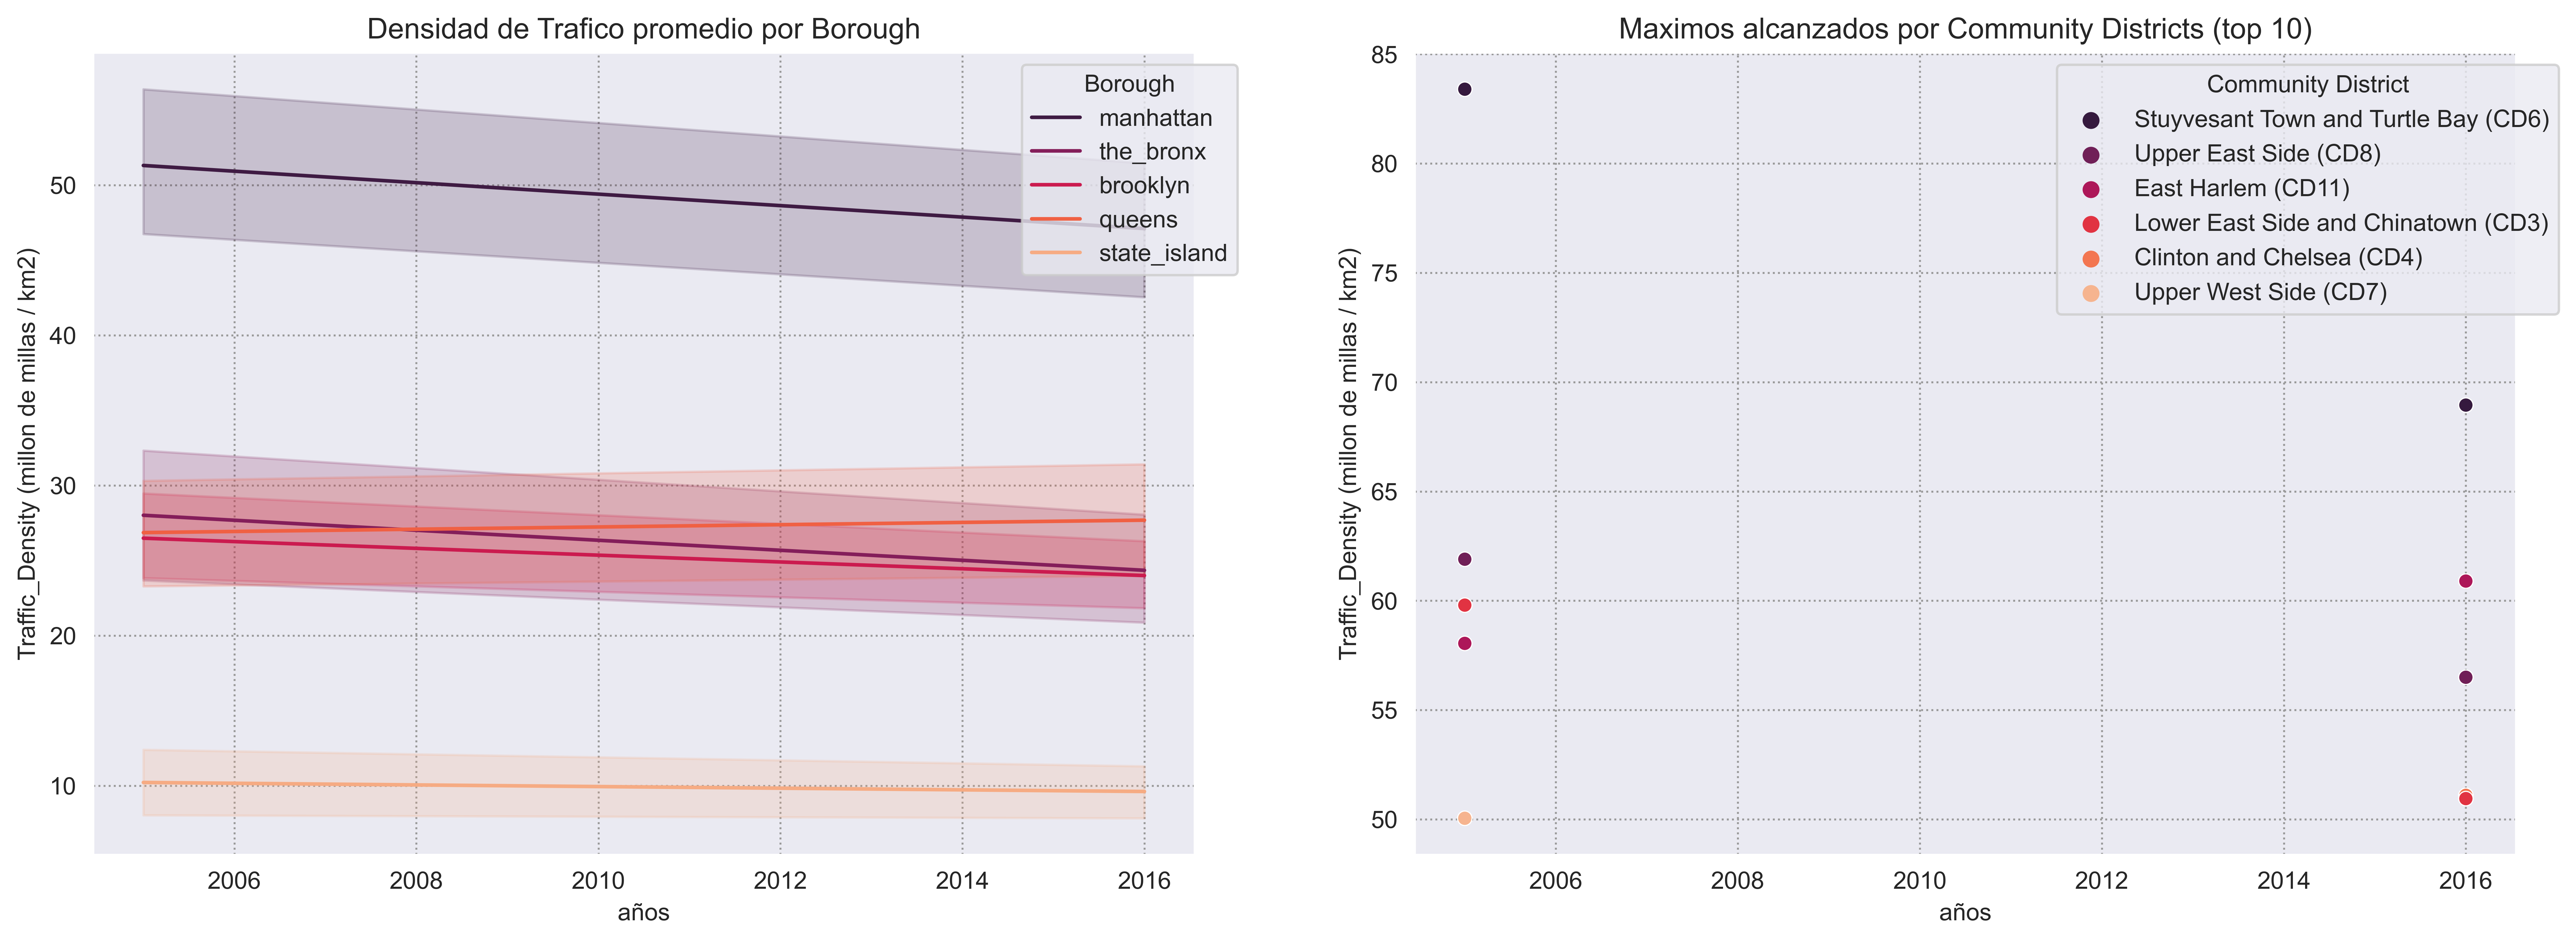

In [108]:
#Graficas

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})# Tema para de backgroung grafs

# Se crea Subplot de 1*2

fig, ax = plt.subplots(1, 2, figsize=(18, 6),dpi=600)

# Gráfico 1 Densidad de Trafico promedio por Borough

sns.lineplot(x="date", y="traffic_Density", data=trafic,  hue='borough', ax=ax[0], markers=True, palette="rocket")
    # Etiquetas
ax[0].set_xlabel('años')
ax[0].set_ylabel('Traffic_Density (millon de millas / km2)')
ax[0].set_title('Densidad de Trafico promedio por Borough')
    # Leyenda
ax[0].legend(title='Borough', loc='upper right', bbox_to_anchor=(1.05, 1)) 


# Gráfico 2 Maximos alcanzados por Community Districts (top 10)

sns.scatterplot(x="date", y="traffic_Density", data=trafic_top_cd, palette="rocket", hue='cd_name', ax=ax[1], markers=True)
     # Etiquetas
ax[1].set_xlabel('años')
ax[1].set_ylabel('Traffic_Density (millon de millas / km2)')
ax[1].set_title('Maximos alcanzados por Community Districts (top 10)')
    # Leyenda
ax[1].legend(title='Community District', loc='upper right', bbox_to_anchor=(1.05, 1)) 

plt.show()

## Dataset 2. Calidad del aire

In [79]:
df['name'].value_counts()

Nitrogen Dioxide (NO2)                                       2124
Fine Particulate Matter (PM2.5)                              2124
Ozone (O3)                                                    708
Sulfur Dioxide (SO2)                                          472
Traffic Density- Annual Vehicle Miles Traveled                118
Traffic Density- Annual Vehicle Miles Traveled for Trucks     118
Traffic Density- Annual Vehicle Miles Traveled for Cars       118
Avg Formaldehyde                                               59
Avg Benzene                                                    59
Name: name, dtype: int64

In [111]:
# Se elimina las filas de trafico del dataset

CD_air = df[df['name'] != 'Traffic Density- Annual Vehicle Miles Traveled for Cars']
CD_air = CD_air[CD_air['name'] != 'Traffic Density- Annual Vehicle Miles Traveled']
CD_air = CD_air[CD_air['name'] != 'Traffic Density- Annual Vehicle Miles Traveled for Trucks']

CD_air = CD_air.reset_index(drop=True)


In [125]:
# se valida tipo de datos
CD_air.dtypes


name                      object
measure                   object
measure_info              object
geo_type_name             object
geo_join_id                int64
geo_place_name            object
time_period               object
start_date        datetime64[ns]
data_value               float64
borough                   object
dtype: object

In [112]:
# Separo str en la columna time_period me quedo solo con la estación del año
CD_air['time_period'] = CD_air['time_period'].str.split(' ').str[0]
CD_air.sample(3)

name measure         measure_info  \
5492                       Ozone (O3)    Mean                  ppb   
4930  Fine Particulate Matter (PM2.5)    Mean  mcg per cubic meter   
2568                       Ozone (O3)    Mean                  ppb   

     geo_type_name  geo_join_id                 geo_place_name time_period  \
5492            CD          208  Riverdale and Fieldston (CD8)      Summer   
4930            CD          111             East Harlem (CD11)      Winter   
2568            CD          203   Morrisania and Crotona (CD3)      Summer   

     start_date  data_value    borough  
5492 2020-06-01       28.72  the_bronx  
4930 2018-12-01        7.80  manhattan  
2568 2011-06-01       31.87  the_bronx

In [113]:
# Se elimina columna 'time_period' 
CD_air = CD_air.drop(['measure','geo_type_name'], axis=1)

# Se renombra columnas
CD_air.columns=['carga_cont','measure_info', 'geo_id_cd','cd_name','time_period','date','data_value','borough']

#Se Reordenan las columnas
CD_air = CD_air.iloc[:,[2,3,7,4,5,0,6,1]]

CD_air.sample(5)

geo_id_cd                               cd_name       borough  \
3403        317                  East Flatbush (CD17)      brooklyn   
1347        406      Rego Park and Forest Hills (CD6)        queens   
2943        411        Bayside and Little Neck (CD11)        queens   
63          502     South Beach and Willowbrook (CD2)  state_island   
1429        112  Washington Heights and Inwood (CD12)     manhattan   

     time_period       date                       carga_cont  data_value  \
3403      Summer 2015-06-01                       Ozone (O3)   32.390000   
1347      Winter 2010-12-01  Fine Particulate Matter (PM2.5)   12.410000   
2943        2011 2011-01-01                      Avg Benzene    1.239291   
63        Winter 2008-12-01             Sulfur Dioxide (SO2)    2.180000   
1429      Winter 2012-12-01  Fine Particulate Matter (PM2.5)   12.070000   

             measure_info  
3403                  ppb  
1347  mcg per cubic meter  
2943                µg/m3  
63                    ppb  
1429  mcg per cubic meter

**Material Particulado PM 2.5**

In [118]:
CD_air_pm=CD_air[CD_air['carga_cont'] == "Fine Particulate Matter (PM2.5)"]
CD_air_pm = CD_air_pm.groupby(['borough', 'date']).data_value.mean().reset_index()

In [152]:
CD_air_pm.sample(2)

borough       date  data_value
148  the_bronx 2020-01-01    6.154167
87      queens 2019-12-01    7.655714

**Nitrogen Dioxide (NO2)**

In [151]:
CD_air_no2=CD_air[CD_air['carga_cont'] == "Nitrogen Dioxide (NO2)"]

CD_air_no2 = CD_air_no2.groupby(['borough', 'date']).data_value.mean().reset_index()
CD_air_no2.sample(2)

borough       date  data_value
12       brooklyn 2014-12-01   25.588889
108  state_island 2016-12-01   19.016667

**Ozone (O3)**

In [150]:
CD_air_o3=CD_air[CD_air['carga_cont'] == "Ozone (O3)"]

CD_air_o3 = CD_air_o3.groupby(['borough', 'date']).data_value.mean().reset_index()
CD_air_o3.sample(2)

borough       date  data_value
17  manhattan 2014-06-01   26.807500
3    brooklyn 2012-06-01   33.394444

**Sulfur Dioxide (SO2)**

In [149]:
CD_air_so2=CD_air[CD_air['carga_cont'] == "Sulfur Dioxide (SO2)"]
CD_air_so2 = CD_air_so2.groupby(['borough', 'date']).data_value.mean().reset_index()
CD_air_so2.sample(2)

borough       date  data_value
4  brooklyn 2012-12-01    0.937778
3  brooklyn 2011-12-01    1.633889

In [160]:
# graficas

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"}) # Formato para el Backgound del grafico


# Se crea Subplot de 2*2
fig, ax = plt.subplots(2, 2, figsize=(20, 12),dpi=800)

# grafica1 PM 2.5

sns.lineplot(x="date", y="data_value", data=CD_air_pm,  hue='borough', ax=ax[0,0],  markers=True, palette="magma")
    # etiquetas & ejes
ax[0,0].set_xlabel('años')
ax[0,0].set_ylabel('PM 2.5 µg / cm3')
ax[0,0].set_title('Carga Contaminante Material Particulado de 2.5 micras')
    # Leyenda
ax[0,0].legend(title='Borough', loc='upper right', bbox_to_anchor=(1.05, 1)) 

# grafica2 NO2

sns.lineplot(x="date", y="data_value", data=CD_air_no2,  hue='borough', ax=ax[0,1], markers=True, palette="magma")
   # etiquetas & ejes
ax[0,1].set_xlabel('años')
ax[0,1].set_ylabel('NO2 ppb')
ax[0,1].set_title('Carga Contaminante Dióxido de Nitrógeno')
 # Leyenda
ax[0,1].legend(title='Borough', loc='upper right', bbox_to_anchor=(1.05, 1)) 

# grafica3 Ozono O3

sns.lineplot(x="date", y="data_value", data=CD_air_o3,  hue='borough', ax=ax[1,0], markers=True,   palette="magma")
    # etiquetas & ejes
ax[1,0].set_xlabel('años')
ax[1,0].set_ylabel('O3 ppb')
ax[1,0].set_title('Carga Contaminante Ozono')
 # Leyenda
ax[1,0].legend(title='Borough', loc='upper right', bbox_to_anchor=(1.05, 1)) 

# grafica4 Dioxido de Azufre

sns.lineplot(x="date", y="data_value", data=CD_air_so2,  hue='borough', ax=ax[1,1], markers=True,   palette="magma")
    # etiquetas & ejes
ax[1,1].set_xlabel('años')
ax[1,1].set_ylabel('SO2 ppb')
ax[1,1].set_title('Carga Contaminante Dioxido de Azufre')
 # Leyenda
ax[1,1].legend(title='Borough', loc='upper right', bbox_to_anchor=(1.05, 1)) 


plt.show()


In [14]:
# Se exporta dataset

df_final.to_parquet("df_final.parquet",index=False)     #dataframe 1